In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from matplotlib.colors import LogNorm
from matplotlib import cm
import matplotlib
from scipy import stats
import copy
from function import new_blues_cb
from function import confid
newblue = new_blues_cb()

In [2]:
# data for fft of running avergaed filtered ssh
path = '/vortexfs1/home/wwu/Rossby_Wave_Project/data/fft_filtered_hann_detrend_ssh_14yrs_all_freqs.nc'
#path = 'data/fft_filtered_hann_detrend_ssh_14yrs_all_freqs.nc'
nc = Dataset(path,'r')
lon,lat = np.meshgrid(nc.variables['lon'][:],nc.variables['lat'][:])
lon =360*(lon<0)+lon
fft = nc.variables['fftreal'][150:160,:,:] \
       + 1j* nc.variables['fftimg'][150:160,:,:]
N = 1022. # number of data points (use later to normalize fft output)
# the spacing of frequency 
df = nc.variables['cycle_per_day'][1]- nc.variables['cycle_per_day'][0]
#Spectrum by averaging over 10 frequency bands 
S_h = np.mean(2.*(np.absolute(fft)**2.)/(N**2. * df),axis = 0)
#error bar at the 95% confidence interval
nu = 2*len(nc.variables['cycle_per_day'][150:160])/1.9445
alpha = 0.05
lower, upper = confid(alpha, nu)


# data for fft of 0.1 degree resolution ssh
path1= '/vortexfs1/home/wwu/Rossby_Wave_Project/data/fft_resample_hann_detrend_ssh_14yrs_all_freqs.nc'
#path1='data/fft_resample_hann_detrend_ssh_14yrs_all_freqs.nc'
nc1 = Dataset(path1,'r')
fft_h = nc1.variables['fftreal'][150:160,:,:] \
       + 1j* nc1.variables['fftimg'][150:160,:,:]
S_h_2 = np.mean(2.*(np.absolute(fft_h)**2.)/(N**2. * df),axis = 0)


# data for fft of 0.1 degree resolution SU,SV (depth-averaged U,V in cm/s)
path2= '/vortexfs1/home/wwu/Rossby_Wave_Project/data/fft_su_hann_33_day.nc'
path3= '/vortexfs1/home/wwu/Rossby_Wave_Project/data/fft_sv_hann_33_day.nc'
#path2 = 'data/fft_su_hann_33_day.nc'
#path3 = 'data/fft_sv_hann_33_day.nc'
nc2 = Dataset(path2,'r')
fft_u = nc2.variables['fft_su_real'][:] \
       + 1j* nc2.variables['fft_su_img'][:]
nc3 = Dataset(path3,'r')
fft_v = nc3.variables['fft_sv_real'][:] \
       + 1j* nc3.variables['fft_sv_img'][:]
R0 = 1.027 # sea water density in g/cm^3
# SU, SV are in unit of cm/s
S_u = np.mean(2.* (np.absolute(fft_u)**2.)/(N**2. * df),axis = 0)
S_v = np.mean(2.* (np.absolute(fft_v)**2.)/(N**2. * df),axis = 0)
S_ke = 0.5 * R0 *(S_u + S_v) 

loc = np.empty(2,) # index of reference point
loc[0] = 354
loc[1] = 1100

In [3]:
# find the lower and upper limit of colorbar
np.percentile(S_ke[~S_ke.mask],99.9),np.percentile(S_ke[~S_ke.mask],0.1)

(2066.5444689892593, 0.0965193168398856)

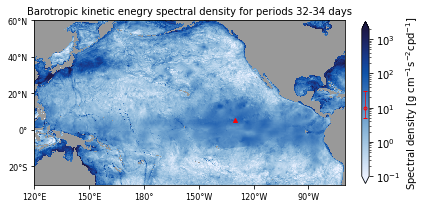

In [4]:
plt.figure()
degree_sign= u'\N{DEGREE SIGN}'
current_cmap = newblue
current_cmap.set_bad(color='0.6')
cs = plt.pcolormesh(lon,lat,S_ke,shading = 'nearest',\
              norm=LogNorm(vmin = 1e-1,vmax = 2e3),cmap=current_cmap)
plt.axis('scaled')
cb = plt.colorbar(cs,extend='both',fraction = 0.022)
cb.set_label('Spectral density [g cm$^{-1}$s$^{-2}$cpd$^{-1}$]',fontsize = 10)

#draw error bar 
xc = 10.
cb.ax.plot(xc,1e1, marker = 'o',fillstyle='none', markersize= 3, color ='r')
#upper bound of error bar at 1e1 spectral density
cb.ax.plot(xc, 1e1*upper,marker = '_',fillstyle='none',markersize= 4,color ='r' )
cb.ax.plot([xc,xc], [1e1*lower,1e1*upper],linewidth= 0.7,color ='r' )
#lower bound of error bar at 1e1 spectral density
cb.ax.plot(xc,lower*1e1,marker = '_',fillstyle='none',markersize= 4,color ='r' )


x0 = lon[int(loc[0]),int(loc[1])]
y0 = lat[int(loc[0]),int(loc[1])]
plt.plot(x0, y0, marker='^',color='red',markersize = 4)

plt.xticks([120,150,180,210,240,270],['120'+degree_sign+'E', '150'+degree_sign+'E','180'+degree_sign, '150'+degree_sign+'W','120'+degree_sign+'W','90'+degree_sign+'W'],fontsize = 8)
plt.yticks([-20,0,20,40,60],['20'+degree_sign+'S','0'+degree_sign, '20'+degree_sign+'N', '40'+degree_sign+'N', '60'+degree_sign+'N'],fontsize = 8)
plt.title('Barotropic kinetic enegry spectral density for periods 32-34 days',size = 10.)

plt.savefig('S_unfiltered_ke.png',dpi = 300,bbox_inches='tight', pad_inches=0)

plt.show()

In [6]:
# find the lower and upper limit of colorbar
np.percentile(S_h_2[~S_h_2.mask],99.9),np.percentile(S_h_2[~S_h_2.mask],0.1)

(3067.4103171851266, 1.6594241646890198)

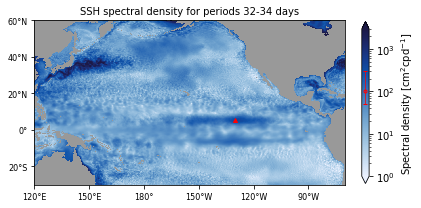

In [7]:
plt.figure()
degree_sign= u'\N{DEGREE SIGN}'
current_cmap = newblue
current_cmap.set_bad(color='0.6')
cs = plt.pcolormesh(lon,lat,S_h_2,shading = 'nearest',\
              norm=LogNorm(vmin = 1e0,vmax = 3e3),cmap=current_cmap)
plt.axis('scaled')
cb = plt.colorbar(cs,extend='both',fraction = 0.022)
cb.set_label('Spectral density [cm$^2$cpd$^{-1}$]',fontsize = 10)

#draw error bar 
xc = 50.
cb.ax.plot(xc,1e2, marker = 'o',fillstyle='none', markersize= 3, color ='r')
#upper bound of error bar at 1e1 spectral density
cb.ax.plot(xc, 1e2*upper,marker = '_',fillstyle='none',markersize= 4,color ='r' )
cb.ax.plot([xc,xc], [1e2*lower,1e2*upper],linewidth= 0.7,color ='r' )
#lower bound of error bar at 1e1 spectral density
cb.ax.plot(xc,lower*1e2,marker = '_',fillstyle='none',markersize= 4,color ='r' )


x0 = lon[int(loc[0]),int(loc[1])]
y0 = lat[int(loc[0]),int(loc[1])]
plt.plot(x0, y0, marker='^',color='red',markersize = 4)

plt.xticks([120,150,180,210,240,270],['120'+degree_sign+'E', '150'+degree_sign+'E','180'+degree_sign, '150'+degree_sign+'W','120'+degree_sign+'W','90'+degree_sign+'W'],fontsize = 8)
plt.yticks([-20,0,20,40,60],['20'+degree_sign+'S','0'+degree_sign, '20'+degree_sign+'N', '40'+degree_sign+'N', '60'+degree_sign+'N'],fontsize = 8)
plt.title('SSH spectral density for periods 32-34 days',size = 10.)

#plt.savefig('S_unfiltered_ssh.png',dpi = 300,bbox_inches='tight', pad_inches=0)#

plt.show()

In [9]:
# find the lower and upper limit of colorbar
np.percentile(S_h[~S_h.mask],99.9),np.percentile(S_h[~S_h.mask],0.1)

(276.7605743883221, 1.3302411914861438)

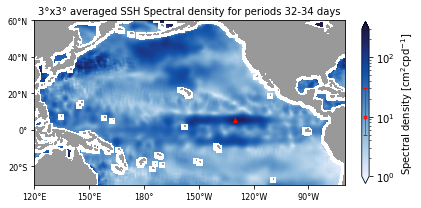

In [11]:
fig = plt.figure()
degree_sign= u'\N{DEGREE SIGN}'

current_cmap1 = newblue
current_cmap1.set_bad(color='0.6')
plt.pcolormesh(lon,lat,S_ke,shading = 'nearest',cmap=current_cmap1 )

current_cmap = newblue
current_cmap.set_bad(color='1.0')
cs = plt.pcolormesh(lon,lat,S_h,shading = 'nearest',\
              norm=LogNorm(vmin = 1e0,vmax = 3e2),cmap=current_cmap )
plt.axis('scaled')
cb = plt.colorbar(cs,extend='both',fraction = 0.022)
cb.set_label('Spectral density [cm$^2$cpd$^{-1}$]',fontsize = 10)

#draw error bar 
xc = 15.
cb.ax.plot(xc,1e1, marker = 'o',fillstyle='none', markersize= 3, color ='r')
#upper bound of error bar at 1e1 spectral density
cb.ax.plot(xc, 1e1*upper,marker = '_',fillstyle='none',markersize= 4,color ='r' )
cb.ax.plot([xc,xc], [1e1*lower,1e1*upper],linewidth= 0.7,color ='r' )
#lower bound of error bar at 1e1 spectral density
cb.ax.plot(xc,lower*1e1,marker = '_',fillstyle='none',markersize= 4,color ='r' )

plt.scatter(lon[S_ke.mask],lat[S_ke.mask],color='0.6',marker=',',lw = 0.0,s=(72./fig.dpi)**2)


x0 = lon[int(loc[0]),int(loc[1])]
y0 = lat[int(loc[0]),int(loc[1])]
plt.plot(x0, y0, marker='^',color='red',markersize = 4)

plt.xticks([120,150,180,210,240,270],['120'+degree_sign+'E', '150'+degree_sign+'E','180'+degree_sign, '150'+degree_sign+'W','120'+degree_sign+'W','90'+degree_sign+'W'],fontsize = 8)
plt.yticks([-20,0,20,40,60],['20'+degree_sign+'S','0'+degree_sign, '20'+degree_sign+'N', '40'+degree_sign+'N', '60'+degree_sign+'N'],fontsize = 8)
plt.title('3'+degree_sign+'x'+'3'+degree_sign+ ' averaged SSH Spectral density for periods 32-34 days',size = 10.)

#plt.savefig('S_filtered_ssh.png',dpi = 300,bbox_inches='tight', pad_inches=0)


plt.show()